In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [3]:
df_init = pd.read_csv("data/data_cleaned_ph2.csv")
df_ref = pd.read_csv("data/lof/data-lof-2024-06-03.csv")

In [4]:
df = pd.read_csv("data/knn/data-knn-2024-06-10.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198440 entries, 0 to 198439
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        198440 non-null  int64  
 1   id_mls                    198440 non-null  object 
 2   bathrooms_total           198440 non-null  float64
 3   bedrooms_extra            198440 non-null  float64
 4   bedrooms                  198440 non-null  float64
 5   stories_total             198440 non-null  float64
 6   size_interior             198440 non-null  float64
 7   building_type             198440 non-null  object 
 8   agency_name               198440 non-null  object 
 9   agency_type               198440 non-null  object 
 10  property_type             198440 non-null  object 
 11  lng                       198440 non-null  float64
 12  lat                       198440 non-null  float64
 13  ownership_type            198440 non-null  o

In [6]:
df["province"].value_counts()

province
Ontario                    98749
British Columbia           42585
Alberta                    27263
Quebec                      9367
Saskatchewan                7576
Manitoba                    5921
Nova Scotia                 3293
New Brunswick               2143
Prince Edward Island         700
Newfoundland & Labrador      650
Yukon                        131
Northwest Territories         62
Name: count, dtype: int64

In [7]:
df["province"].value_counts()

province
Ontario                    98749
British Columbia           42585
Alberta                    27263
Quebec                      9367
Saskatchewan                7576
Manitoba                    5921
Nova Scotia                 3293
New Brunswick               2143
Prince Edward Island         700
Newfoundland & Labrador      650
Yukon                        131
Northwest Territories         62
Name: count, dtype: int64

In [8]:
# df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

In [9]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       98749.0
mean       918104.0
std        525669.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1095000.0
max      19999000.0
Name: price, dtype: float64

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

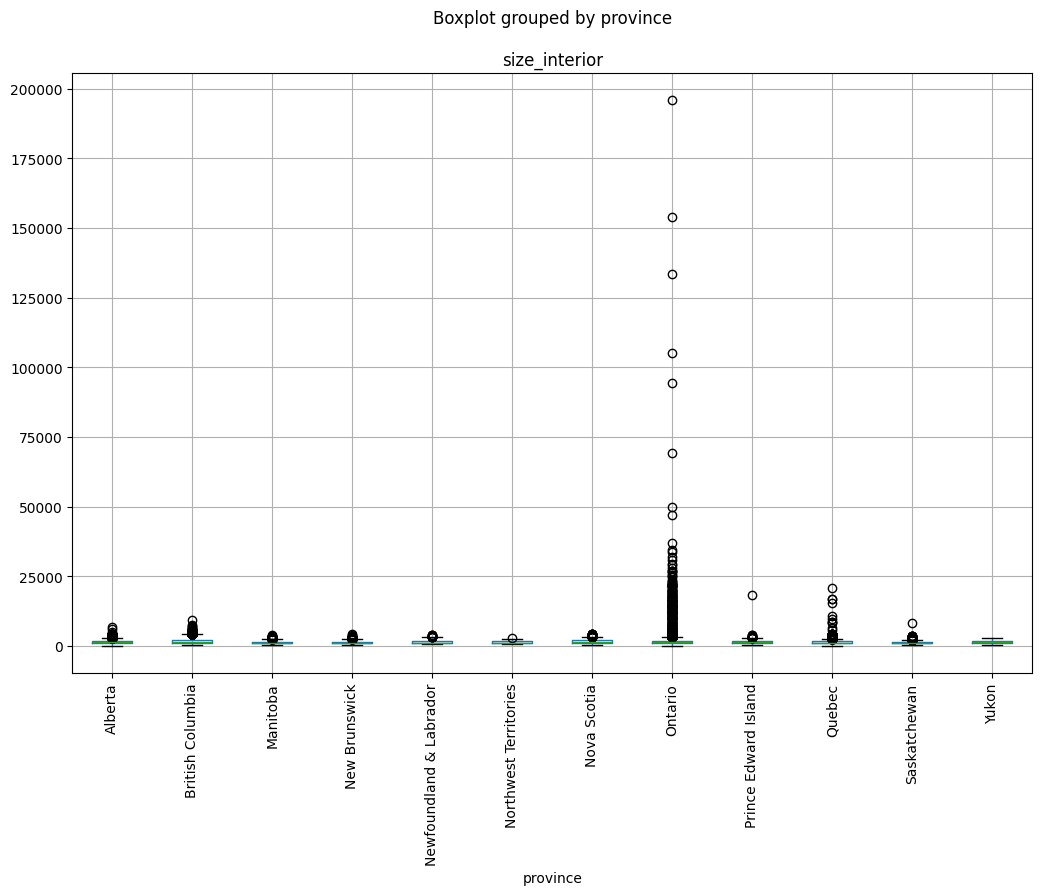

In [10]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [11]:
q0 = 0
q25 = df_init["size_interior"].quantile(0.25)
q75 = df_init["size_interior"].quantile(0.75)
iqr = q75 - q25

df = df[(df["size_interior"]>=abs(q25-q0)*0.33) & (df["size_interior"] < (q75+1.5*iqr))]

abs(q25-q0)*0.33

335.94

<Axes: title={'center': 'size_interior'}, xlabel='province'>

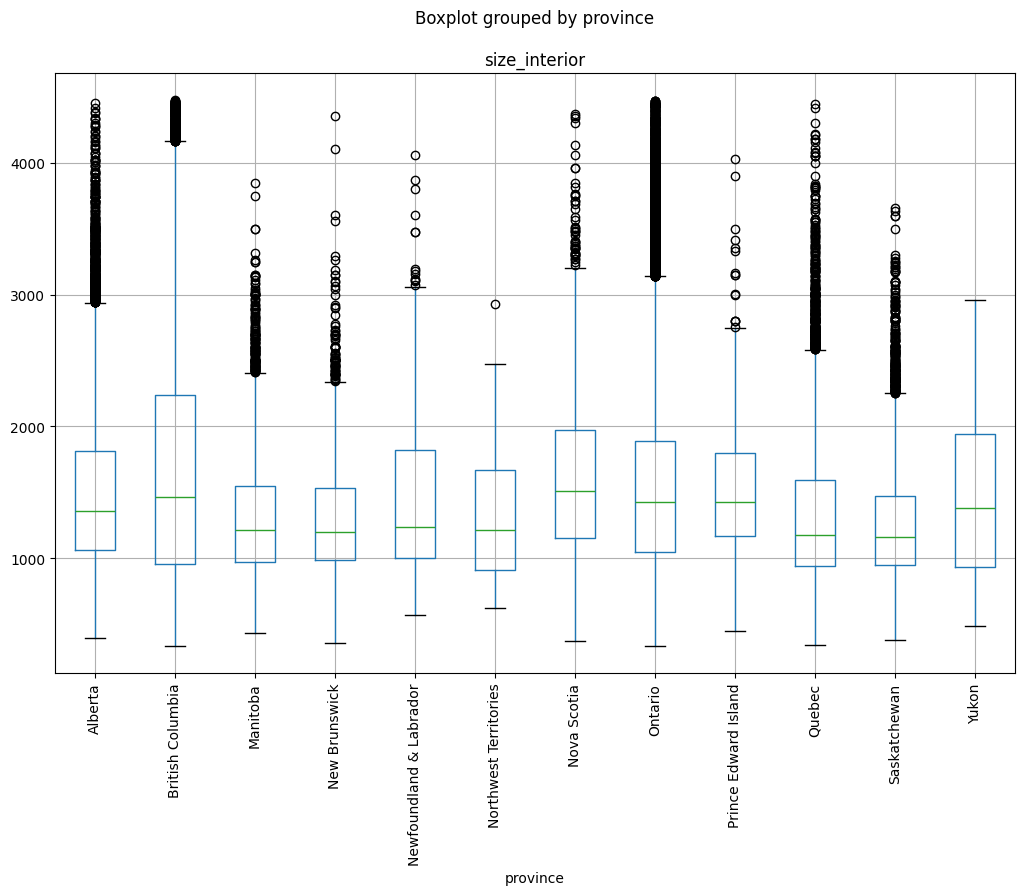

In [12]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

<Axes: title={'center': 'price'}, xlabel='province'>

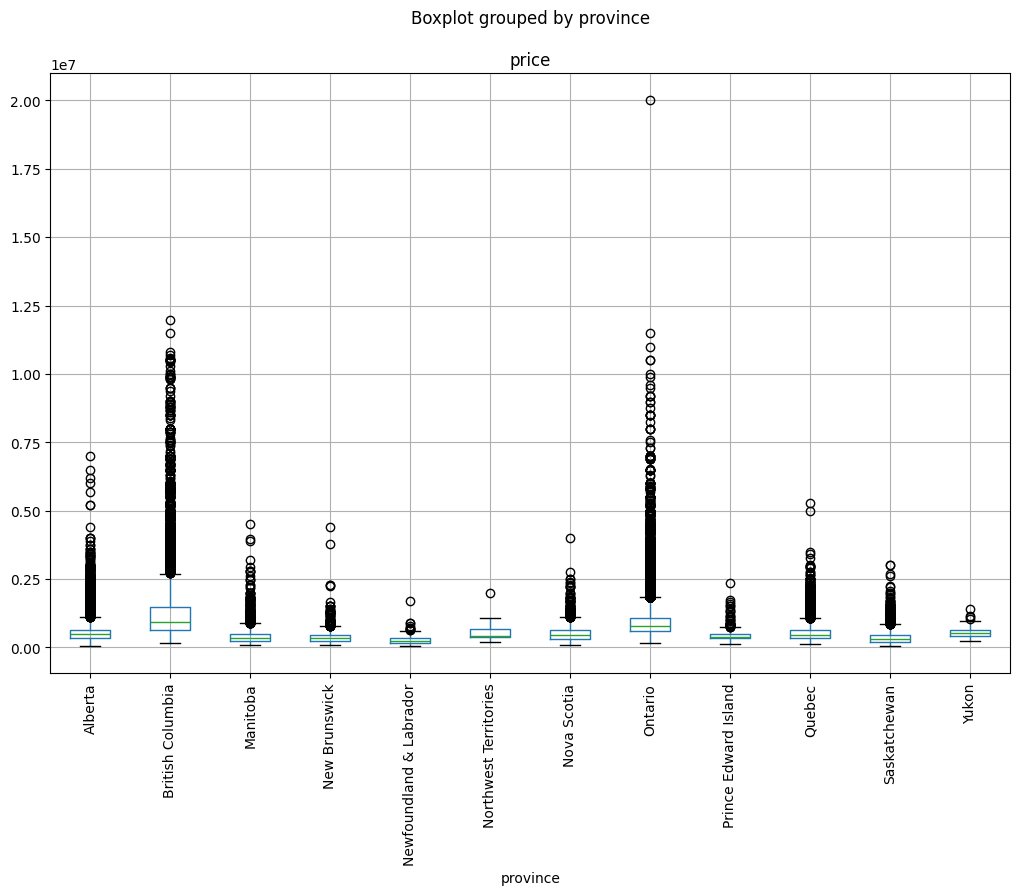

In [13]:
df.boxplot(column="price", by="province", figsize=(12,8), rot=90)

In [14]:
df["province"].value_counts()

province
Ontario                    98468
British Columbia           42540
Alberta                    27259
Quebec                      9351
Saskatchewan                7574
Manitoba                    5921
Nova Scotia                 3293
New Brunswick               2143
Prince Edward Island         699
Newfoundland & Labrador      650
Yukon                        131
Northwest Territories         62
Name: count, dtype: int64

In [15]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       98468.0
mean       918152.0
std        524837.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1095000.0
max      19999000.0
Name: price, dtype: float64

# Anomaly Reduction

In [16]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [17]:
# Detect anomalies on the new dataset based on the previous dataset
lof = LocalOutlierFactor(n_neighbors=10, novelty=True)
scaler = StandardScaler()

df_ref_scaled = scaler.fit_transform(df_ref[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
df_scaled = scaler.transform(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# lof_labels = lof.fit_predict(df_scaled)
# df = df[lof_labels==1]

# lof_labels = lof.fit_predict(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# df = df[lof_labels==1]

lof.fit(df_ref_scaled)

lof_labels = lof.predict(df_scaled)

df = df[lof_labels==1]

<Axes: title={'center': 'size_interior'}, xlabel='province'>

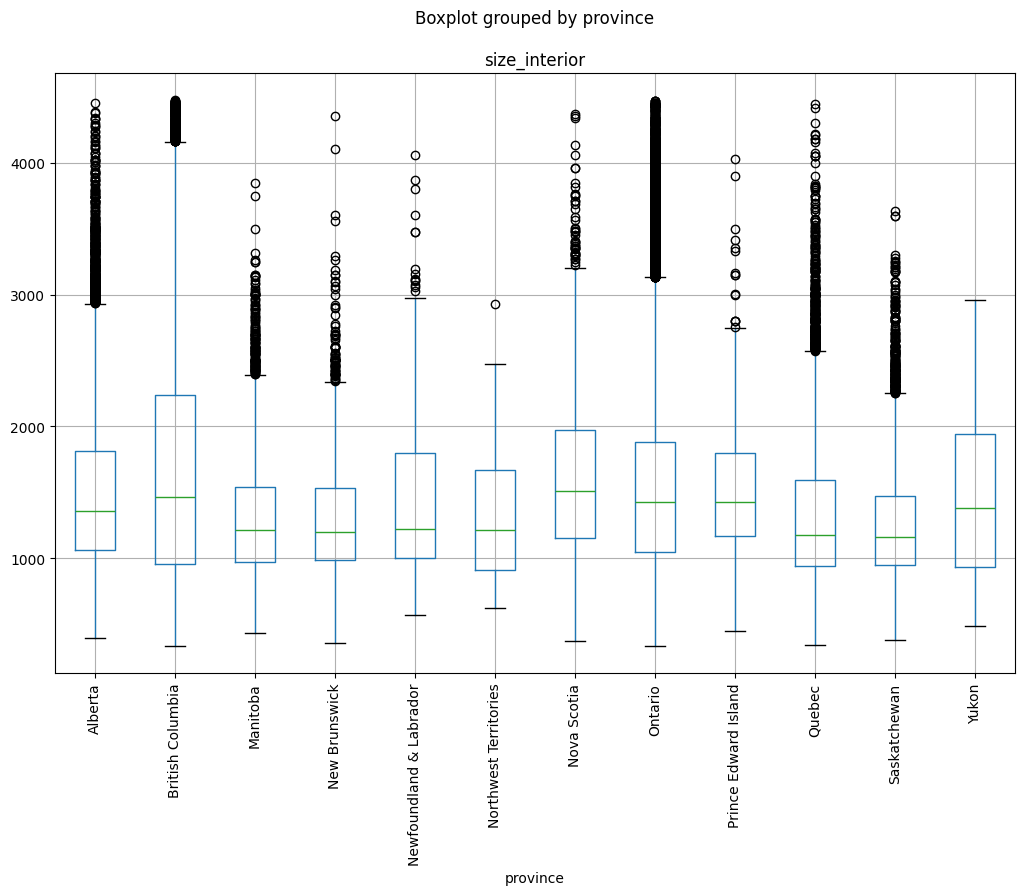

In [18]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196616 entries, 0 to 198439
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        196616 non-null  int64  
 1   id_mls                    196616 non-null  object 
 2   bathrooms_total           196616 non-null  float64
 3   bedrooms_extra            196616 non-null  float64
 4   bedrooms                  196616 non-null  float64
 5   stories_total             196616 non-null  float64
 6   size_interior             196616 non-null  float64
 7   building_type             196616 non-null  object 
 8   agency_name               196616 non-null  object 
 9   agency_type               196616 non-null  object 
 10  property_type             196616 non-null  object 
 11  lng                       196616 non-null  float64
 12  lat                       196616 non-null  float64
 13  ownership_type            196616 non-null  object

In [20]:
df["province"].value_counts()

province
Ontario                    97537
British Columbia           42374
Alberta                    27028
Quebec                      9306
Saskatchewan                7538
Manitoba                    5889
Nova Scotia                 3272
New Brunswick               2140
Prince Edward Island         698
Newfoundland & Labrador      641
Yukon                        131
Northwest Territories         62
Name: count, dtype: int64

In [21]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       97537.0
mean       916767.0
std        520682.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1089990.0
max      11488000.0
Name: price, dtype: float64

In [22]:
df.to_csv("data/lof/data-lof-2024-06-10.csv", index=False)